In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import zscore

In [159]:
df = pd.read_csv("testdata.csv")

In [161]:
df.head

<bound method NDFrame.head of             id                        Model  Year Company     Price  Engine  \
0    200716453             Honda N Box 2019  2019   Honda   3750000     660   
1    200716455      Honda N WGN Custom 2018  2017   Honda   3300000     658   
2    200716452        Honda S660 Alpha 2017  2017   Honda   3885000     658   
3    200701070  Honda Fit GP5 RS Grade 2015  2015   Honda   3890000    1496   
4    200716458     Honda Fit GP5 Sport 2014  2014   Honda   3275000    1496   
..         ...                          ...   ...     ...       ...     ...   
141  200722374                      A6 2015  2015    Audi  11500000    1800   
142  200428354                      A3 2017  2017    Audi   5875000    1000   
143  200722372                      A4 2016  2016    Audi   8500000    1400   
144  200722373                      A4 2013  2013    Audi   6200000    2000   
145  200701696                      Q2 2017  2017    Audi   7575000     990   

         FuelType Tra

In [162]:
df["Transmission"] = df["Transmission"].astype(str)

In [163]:
df= df[(df['Year']>=1990)&(df['Year']<=2020)]
print(df.Year)

0      2019
1      2017
2      2017
3      2015
4      2014
       ... 
141    2015
142    2017
143    2016
144    2013
145    2017
Name: Year, Length: 144, dtype: int64


Text(0, 0.5, 'Price')

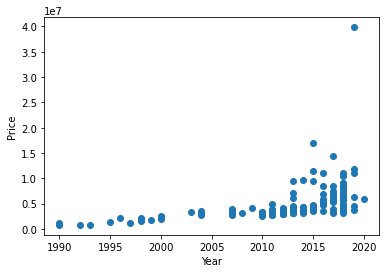

In [164]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [165]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int64
FuelType        object
Transmission    object
Age              int64
Mileage          int64
dtype: object

In [166]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int64
FuelType        object
Transmission    object
Age              int64
Mileage          int64
dtype: object

In [167]:
df = df.astype({"Engine": int, "Age": int})

Text(0, 0.5, 'Price')

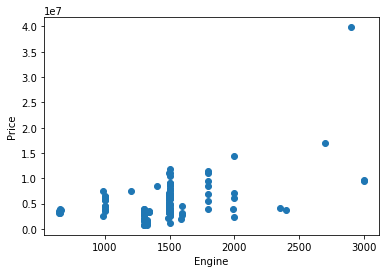

In [168]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Engine")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

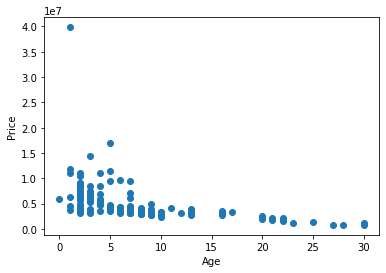

In [169]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

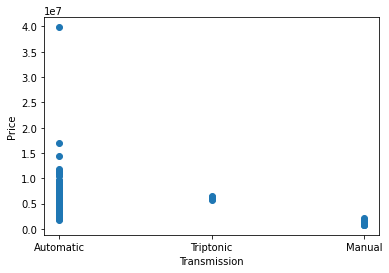

In [170]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Transmission")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

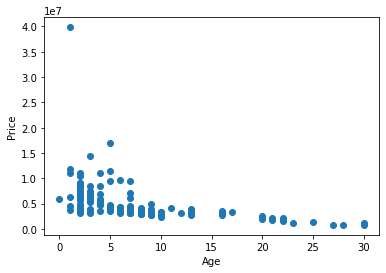

In [171]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

In [172]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'Price')

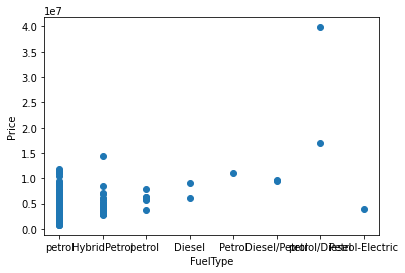

In [173]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("FuelType")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

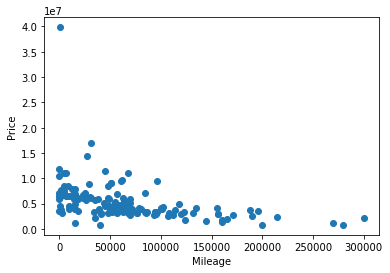

In [174]:
plt.scatter(df['Mileage'], df['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")

In [175]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic', 'Triptonic', 'Manual']
['petrol', 'HybridPetrol', 'petrol ', 'Diesel', 'Petrol', 'Diesel/Petrol', 'petrol/Diesel', 'Petrol-Electric']
0
0
0
0
id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int32
FuelType         int32
Transmission     int32
Age              int32
Mileage          int64
dtype: object
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      1
      ..
141    0
142    0
143    0
144    3
145    0
Name: FuelType, Length: 144, dtype: int32>
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
141    0
142    0
143    0
144    0
145    0
Name: Transmission, Length: 144, dtype: int32>


In [176]:
X = df[['Year','Engine','Age','Transmission','Mileage']]
y = df['Price']

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [178]:
print(X_train) 

     Year  Engine  Age  Transmission  Mileage
131  2012    1500    8             0   135000
68   2014    1496    6             0    52000
114  2010     990   10             0   107000
121  2007    1300   13             0   112000
141  2015    1800    5             0    45000
..    ...     ...  ...           ...      ...
66   2012    1339    8             0    85945
65   2013    1339    7             0    68000
105  2018    1500    2             0    15000
96   2018    1500    2             0        0
135  2004    1500   16             0   196000

[115 rows x 5 columns]


In [179]:
print(X_test)

     Year  Engine  Age  Transmission  Mileage
109  2019    2900    1             0      500
6    2014    1496    6             0    84000
145  2017     990    3             0     4500
25   1996    1490   21             0   300000
12   2018    1000    2             1    30576
123  1993    1300   27             2    40000
49   2016    1496    4             0    43595
18   2018    1496    2             0    62300
63   2014    1496    6             0    66000
19   2018    1496    2             0    25000
53   2010    1300   10             0   156000
0    2019     660    1             0     1850
27   2011    1300    9             0    52000
39   2014    1500    6             0    72000
134  1998    1300   22             2   144000
28   2012    1300    8             0    70000
17   2017    1497    3             0     7900
94   2018    1500    2             0    31000
16   2016    1497    4             0    14000
57   2013    2000    7             0    84000
34   2013    1496    7            

In [180]:
X_test.dtypes

Year            int64
Engine          int32
Age             int32
Transmission    int32
Mileage         int64
dtype: object

In [181]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
clf.predict(X_test)

array([12997003.28602725,  5130494.44362622,  4620439.46441007,
       -1678318.63151658,  6061565.18356931,  2016895.3874737 ,
        6048031.02665788,  6392260.39137691,  5305076.23908597,
        6754032.6675241 ,  2579206.90237272,  3822052.90760732,
        3850726.19416857,  5263242.76573706,  2322322.93718106,
        3938968.8722927 ,  6661151.01424479,  6712199.19417518,
        6339162.70997745,  6929087.73738849,  4712486.15185595,
        3379512.69857621,  7278251.32830805,  2976401.24653572,
        4903178.78403389,  1674817.55284727,  4880519.63530648,
        5432114.87175673,  7275692.31549531])

In [183]:
print(y_test)

109    39850000
6       3375000
145     7575000
25      2075000
12      6290000
123      805000
49      5070000
18      6100000
63      4290000
19      7000000
53      2950000
0       3750000
27      3300000
39      3375000
134     1490000
28      3950000
17      6590000
94      6100000
16      5875000
57      7000000
34      4100000
138     2250000
144     6200000
1       3300000
122     2700000
43      2650000
89      4495000
3       3890000
85     11790000
Name: Price, dtype: int64


In [184]:
print(clf.score(X_test, y_test))

0.41362812327299114


In [185]:
clf.predict([[2025,658,8,0,15000]])

array([5083229.19474649])